In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
T_s = 300
p_s=100000 #Pascals=1bar
g = 9.8
cp = 1037
R_starred = 8314.5 #(m/s)^2 /K
M = 44 #g/mol
R = R_starred/M

## Analytic Solution

In [3]:
def p(z_in):
    return p_s*(1-(g/(cp*T_s))*z_in)**(cp/R)

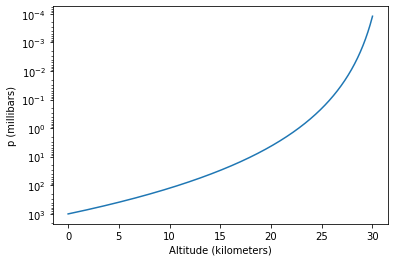

In [4]:
z=np.linspace(0,30000,1000)
pressure=p(z)
plt.xlabel("Altitude (kilometers)")
plt.ylabel("p (millibars)")
#plt.ylim(100,1000)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.plot(np.array(z)/1000,np.array(pressure)/100)
plt.show()

## First Approach

In [5]:
def T(z):
    return T_s-(g/cp)*z

In [6]:
from scipy.integrate import quad

def T_harm(z):
    def integrand(z0): return 1/T(z0)
    I = quad(integrand, 0, z)[0]
    return (I/z)**(-1)

def p(z):
    return p_s*np.exp((-g/(R*T_harm(z)))*z)

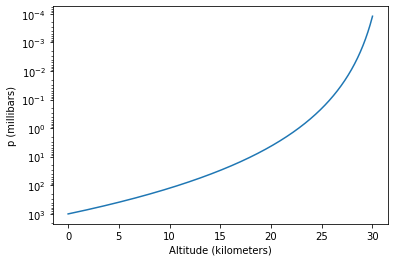

In [7]:
z=np.linspace(0.00001,30000,1000)
pressure=[p(i) for i in z]
plt.xlabel("Altitude (kilometers)")
plt.ylabel("p (millibars)")
plt.yscale('log')
plt.gca().invert_yaxis()
plt.plot(np.array(z)/1000,np.array(pressure)/100)
plt.show()

## Approach with dz/dlnp

In [8]:
#k = ln(p)
def T(k):
    return T_s*(np.exp(k)/p_s)**(R/cp)

def z(p):
    k=np.log(p)
    def integrand(k0): return -(R*T(k0))/g
    I = quad(integrand, np.log(p_s), k)[0]
    return I

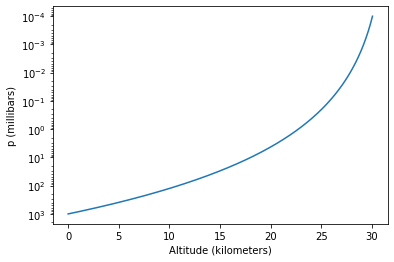

In [9]:
p=np.logspace(-2,5,1000)
altitude=[z(i) for i in p]
plt.xlabel("Altitude (kilometers)")
plt.ylabel("p (millibars)")
plt.yscale('log')
plt.gca().invert_yaxis()
plt.plot(np.array(altitude)/1000,np.array(p)/100)
plt.show()

## Second Approach

In [10]:
# Define a function which calculates the derivative
def f(z,p):
    def T(p0): return T_s*(p0/p_s)**(R/cp)
    return -(p*g)/(R*T(p))

a=0.00001 #start of the interval                                   
b=30000 # end of the interval
N= 1000 #number of steps
h=(b-a)/N #size of an individual step                                          

##Euler's method                                                                                                                                   
p=100000 #initial condition

zpoints=np.arange(a,b,h)

p_solution=[]

for z in zpoints:
    p_solution.append(p)
    p = p+h*f(z,p)

print('The initial pressure at an altitude of zero is', p_solution[0], 'bars.')
print('The final pressure at an altitude of 30 km is', p_solution[-1], 'bars.')

The initial pressure at an altitude of zero is 100000 bars.
The final pressure at an altitude of 30 km is 0.006871333563262875 bars.


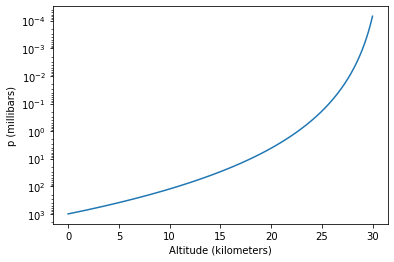

In [11]:
plt.xlabel("Altitude (kilometers)")
plt.ylabel("p (millibars)")
plt.yscale('log')
plt.gca().invert_yaxis()
plt.plot(np.array(zpoints)/1000,np.array(p_solution)/100)
plt.show()